# Python@Library Teil 2
Jitao David Zhang

1. Datei einlesen
2. Neue Spalte schaffen
3. Boxplot verbessern

In [1]:
import pandas as pd

In [2]:
studie = pd.read_csv('20240126-GGG-Studie.tsv', sep='\t')

In [3]:
studie

,Name,Pille,Vor,Nach
0,Silas,C,7.3,4.0
1,Yann,B,8.1,6.0
2,Pascal,B,8.7,7.0
3,Thirushandhini,C,10.0,4.0
4,Jannick,C,6.9,3.0
5,Dalmika,C,9.0,6.0
6,Peter,B,8.1,5.0
7,Diego,A,8.7,6.0
8,Tom,B,7.7,4.0
9,Arwin,C,7.8,4.0


In [4]:
import matplotlib.pyplot as plt

<Axes: >

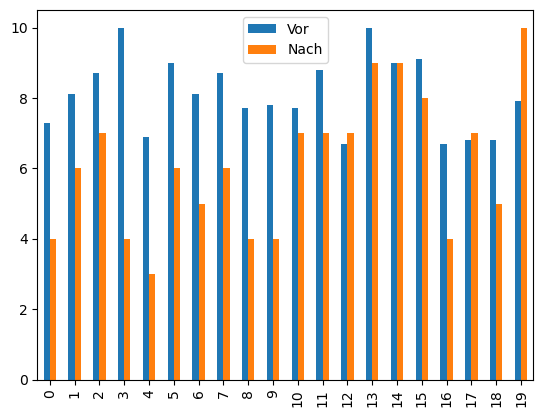

In [5]:
studie.plot.bar()

In [6]:
studie['Unterschied'] = studie['Nach'] - studie['Vor']
studie

,Name,Pille,Vor,Nach,Unterschied
0,Silas,C,7.3,4.0,-3.3
1,Yann,B,8.1,6.0,-2.1
2,Pascal,B,8.7,7.0,-1.7
3,Thirushandhini,C,10.0,4.0,-6.0
4,Jannick,C,6.9,3.0,-3.9
5,Dalmika,C,9.0,6.0,-3.0
6,Peter,B,8.1,5.0,-3.1
7,Diego,A,8.7,6.0,-2.7
8,Tom,B,7.7,4.0,-3.7
9,Arwin,C,7.8,4.0,-3.8


## Hilfe bekommen

Eine Möglichkeit, Hilfe über eine Funktion zu bekommen, ist `SHIFT` und `Tab` gleichzeitig zu drücken, wenn das Maus über die Funktion steht.

In [7]:
help(studie.boxplot)

Help on method boxplot_frame in module pandas.plotting._core:

boxplot_frame(column=None, by=None, ax=None, fontsize=None, rot: 'int' = 0, grid: 'bool' = True, figsize=None, layout=None, return_type=None, backend=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a box plot from DataFrame columns.
    
    Make a box-and-whisker plot from DataFrame columns, optionally grouped
    by some other columns. A box plot is a method for graphically depicting
    groups of numerical data through their quartiles.
    The box extends from the Q1 to Q3 quartile values of the data,
    with a line at the median (Q2). The whiskers extend from the edges
    of box to show the range of the data. By default, they extend no more than
    `1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
    data point within that interval. Outliers are plotted as separate dots.
    
    For further details see
    Wikipedia's entry for `boxplot <https://en.wikipedia.org/w

## Boxplot

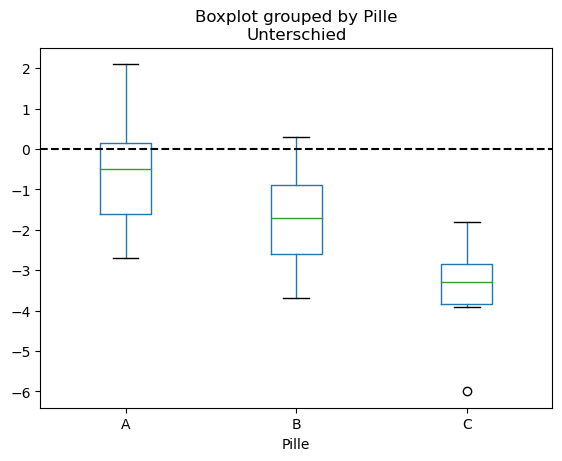

In [8]:
studie.boxplot(column='Unterschied', by='Pille', grid=False)
plt.axhline(y=0, color="k", linestyle="--")

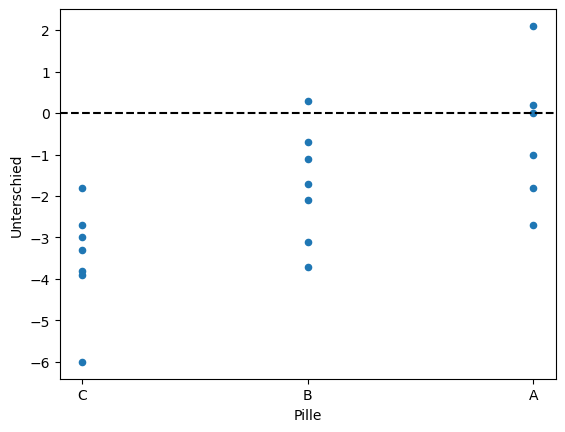

In [9]:
studie.plot.scatter('Pille', 'Unterschied')
plt.axhline(y=0, color='k', linestyle="--")

In [10]:
import statsmodels as sm
import statsmodels.api as sma
from statsmodels.formula.api import ols

In [11]:
stat = ols('Unterschied ~ Pille', data=studie).fit()
print(stat.summary())

                            OLS Regression Results                            
Dep. Variable:            Unterschied   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     6.875
Date:                Sat, 27 Jan 2024   Prob (F-statistic):            0.00649
Time:                        20:48:24   Log-Likelihood:                -34.275
No. Observations:                  20   AIC:                             74.55
Df Residuals:                      17   BIC:                             77.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5333      0.595     -0.897      0.3

## Experimente mit ChatGPT

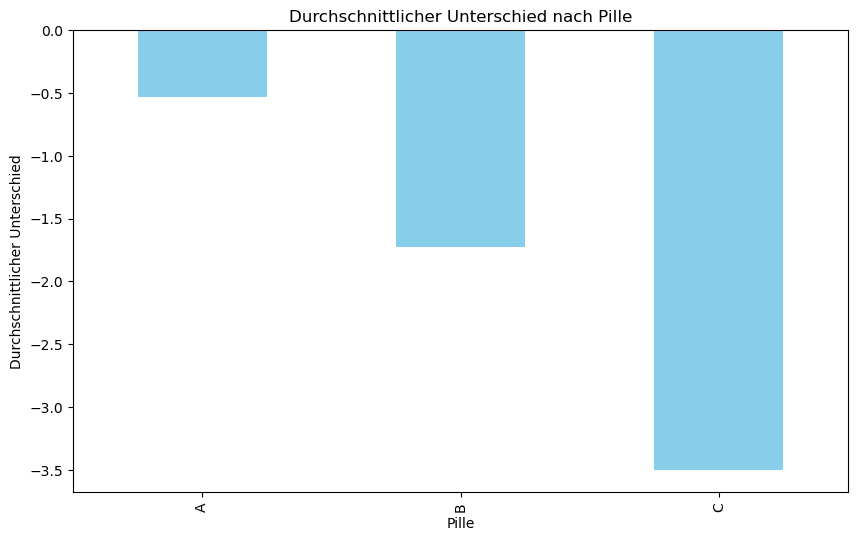

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ihre Daten
data = {
    'Name': ['Silas', 'Yann', 'Pascal', 'Thirushandhini', 'Jannick', 'Dalmika', 'Peter', 'Diego', 'Tom', 'Arwin', 'Valery', 'Stefan', 'Susanne', 'Simon', 'Giulia', 'Dana', 'Alex', 'Mattheo', 'Andreas', 'David'],
    'Pille': ['C', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'A'],
    'Vor': [7.3, 8.1, 8.7, 10.0, 6.9, 9.0, 8.1, 8.7, 7.7, 7.8, 7.7, 8.8, 6.7, 10.0, 9.0, 9.1, 6.7, 6.8, 6.8, 7.9],
    'Nach': [4.0, 6.0, 7.0, 4.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 7.0, 7.0, 7.0, 9.0, 9.0, 8.0, 4.0, 7.0, 5.0, 10.0],
    'Unterschied': [-3.3, -2.1, -1.7, -6.0, -3.9, -3.0, -3.1, -2.7, -3.7, -3.8, -0.7, -1.8, 0.3, -1.0, 0.0, -1.1, -2.7, 0.2, -1.8, 2.1]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
df.groupby('Pille')['Unterschied'].mean().plot(kind='bar', color='skyblue')
plt.title('Durchschnittlicher Unterschied nach Pille')
plt.xlabel('Pille')
plt.ylabel('Durchschnittlicher Unterschied')
plt.show()

<Figure size 1000x600 with 0 Axes>

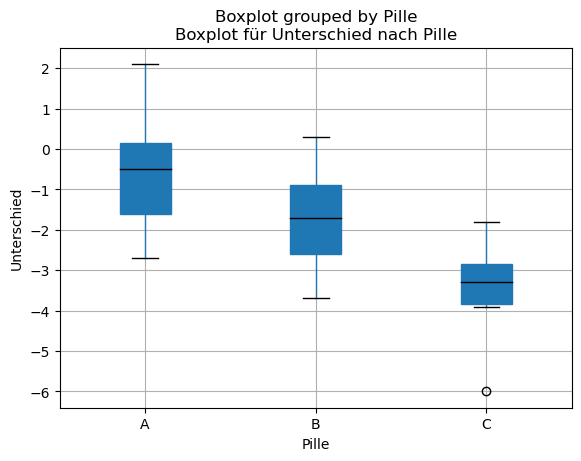

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ihre Daten
data = {
    'Name': ['Silas', 'Yann', 'Pascal', 'Thirushandhini', 'Jannick', 'Dalmika', 'Peter', 'Diego', 'Tom', 'Arwin', 'Valery', 'Stefan', 'Susanne', 'Simon', 'Giulia', 'Dana', 'Alex', 'Mattheo', 'Andreas', 'David'],
    'Pille': ['C', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'C', 'A'],
    'Vor': [7.3, 8.1, 8.7, 10.0, 6.9, 9.0, 8.1, 8.7, 7.7, 7.8, 7.7, 8.8, 6.7, 10.0, 9.0, 9.1, 6.7, 6.8, 6.8, 7.9],
    'Nach': [4.0, 6.0, 7.0, 4.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 7.0, 7.0, 7.0, 9.0, 9.0, 8.0, 4.0, 7.0, 5.0, 10.0],
    'Unterschied': [-3.3, -2.1, -1.7, -6.0, -3.9, -3.0, -3.1, -2.7, -3.7, -3.8, -0.7, -1.8, 0.3, -1.0, 0.0, -1.1, -2.7, 0.2, -1.8, 2.1]
}

df = pd.DataFrame(data)

# Boxplot erstellen
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='Unterschied', by='Pille', patch_artist=True, medianprops={'color':'black'})
plt.title('Boxplot für Unterschied nach Pille')
plt.xlabel('Pille')
plt.ylabel('Unterschied')
plt.show()
